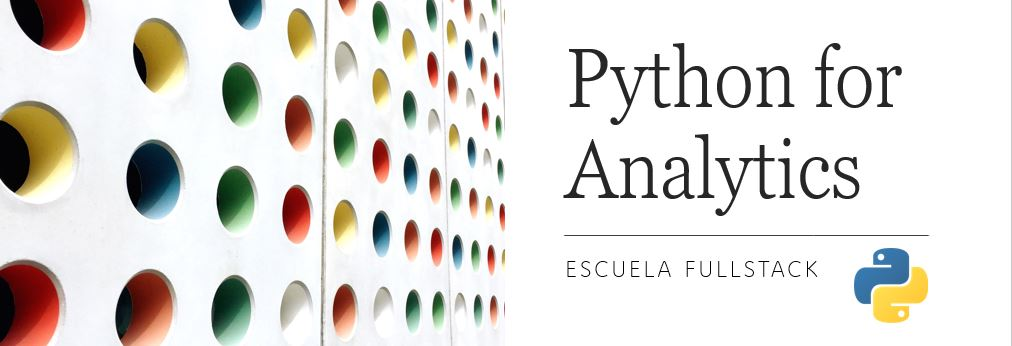

## **Sección 3**
### **Procesamiento de Datos**

En esta sección cubriremos los conceptos:
- Arreglos multidimensionales
- Lectura de datos: operaciones en Dataframe
- Consultas en Dataframe
- Reemplazos o modificaciones en Dataframe
- Groupby, merge y pivot table en Dataframe
- Limpieza de datos (na, dropna, missing values)
- Caso aplicativo: extraer datos libres y preparar el dataset para el análisis

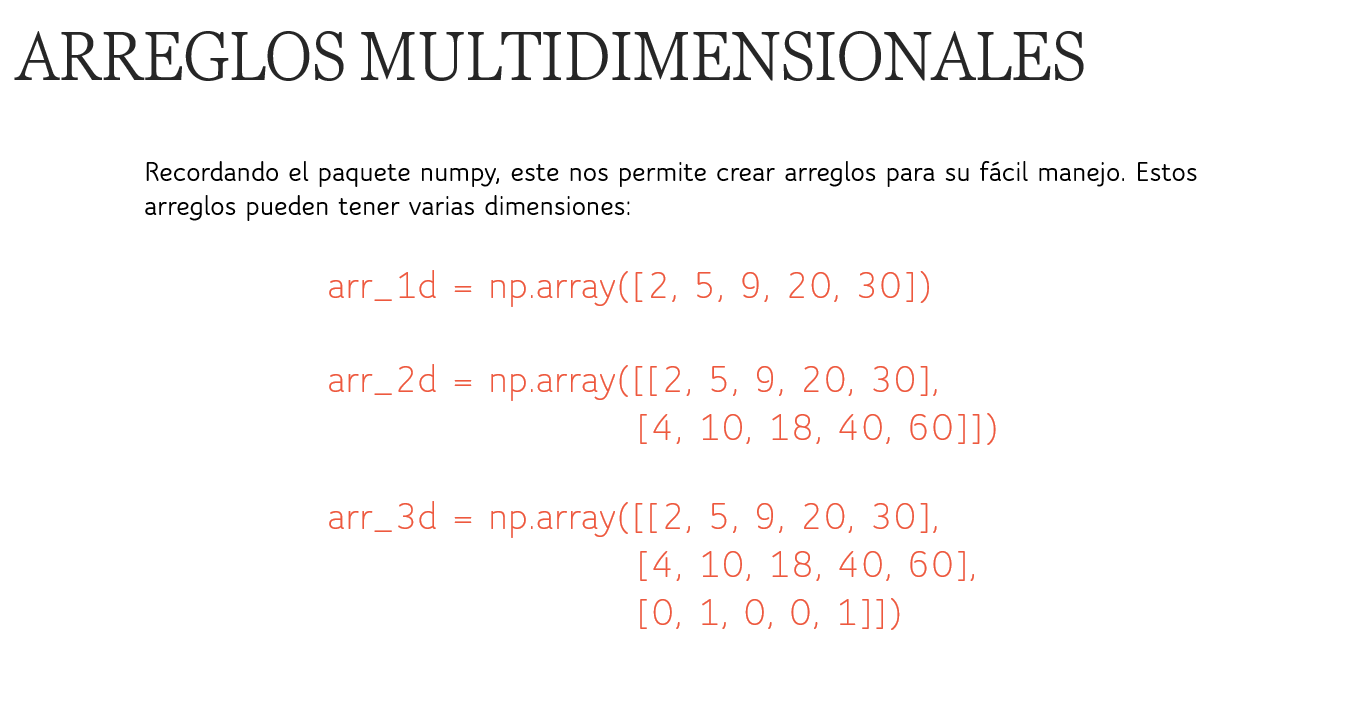

In [ ]:
#Importamos la librería numpy para manejo de arreglos "array"

import numpy as np

In [ ]:
#Definición de arreglos en 1 dimensión o vectores

arr_1d = np.array([2, 5, 9, 20, 30])
arr_1d

In [ ]:
#Accediendo a los valores del arreglo

arr_1d[0:3]

In [ ]:
#Accediendo a los valores del arreglo con operadores relacionales

arr_1d[arr_1d>10]

In [ ]:
#Definición de arreglos en 2 dimensiones o matrices

arr_2d = np.array([[2, 5, 9, 20, 30],[4, 10, 18, 40, 60]])
arr_2d

In [ ]:
#Accediendo a los valores del arreglo 2d

#Primer arreglo de la matriz
print(arr_2d[0,:])

#Segundo arreglo de la matriz
print(arr_2d[1,:])

In [ ]:
#Accediendo a los valores del arreglo 2d

#Valor de índice 3 en el primer arreglo
print(arr_2d[0,3])

#Valor de índice 0 en el segundo arreglo
print(arr_2d[1,0])

In [ ]:
#Realizando cálculos con los valores de un arreglo 2d

arr_2d[0] + arr_2d[1]

In [ ]:
#Definición de arreglos en 3 dimensiones o matrices

arr_3d = np.array([[2, 5, 9, 20, 30],[4, 10, 18, 40, 60],[0, 1, 0, 0, 1]])
arr_3d

In [ ]:
#Accediendo a los valores del arreglo 3d

print(arr_3d[2,:])
print(arr_3d[1,0:2])
print(arr_3d[2, 4])
print(arr_3d[0:2,])
print(arr_3d[0,1:3])

In [ ]:
#Realizando cálculos con los valores de un arreglo 3d

arr_3d[0] * arr_3d[2]

In [ ]:
#Realizando cálculos con los valores de un arreglo 3d

(arr_3d[0] + arr_3d[1]) * arr_3d[2]

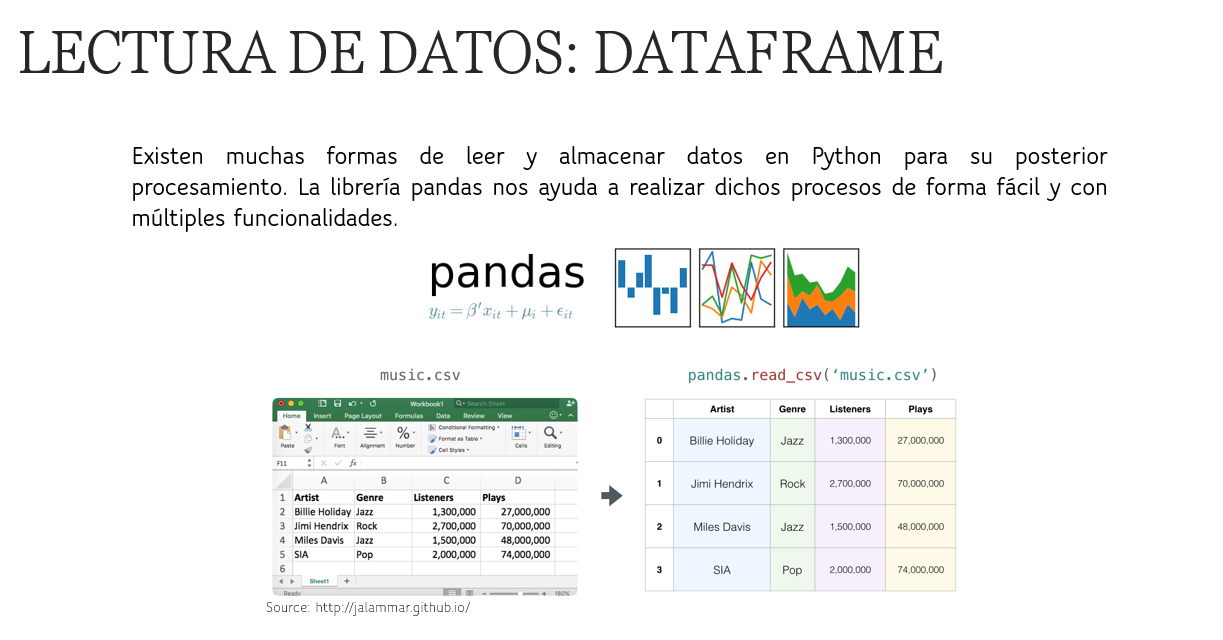

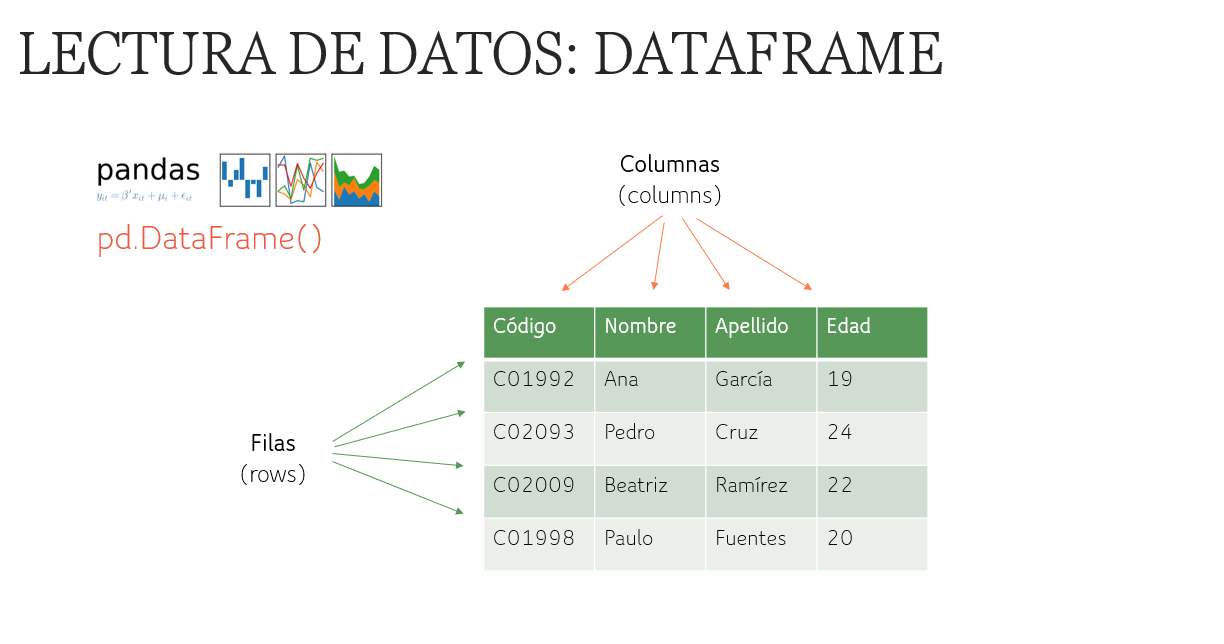

In [ ]:
#Importamos la librería pandas para manejo de DataFrame

import pandas as pd

In [ ]:
#Definición de un Dataframe desde Python

tabla = pd.DataFrame({"Codigo":["C01992","C02093","C02009","C01998"]
                     ,"Nombre":["Ana","Pedro","Beatriz","Paulo"]
                     ,"Apellido":["García","Cruz","Ramírez","Fuentes"]
                     ,"Edad":[19,24,22,20]}
                     )
tabla

In [ ]:
#Accediendo a los datos de Dataframe

tabla["Codigo"]

In [ ]:
#Accediendo a los datos de Dataframe

tabla[["Codigo","Nombre"]]

In [ ]:
#Accediendo a los datos de Dataframe con loc

tabla.loc[2,["Codigo","Nombre"]]

In [ ]:
#Accediendo a los datos de Dataframe con iloc

tabla.iloc[2,0:3]

In [ ]:
#Incluyendo un nuevo registro en la tabla

tabla.loc[4] = ["C02140","Juan","Díaz",25]
tabla

Para los siguientes ejercicios usaremos datos abiertos de la web del Estado Peruano

https://www.datosabiertos.gob.pe/dataset/sunedu-programas-acad%C3%A9micos

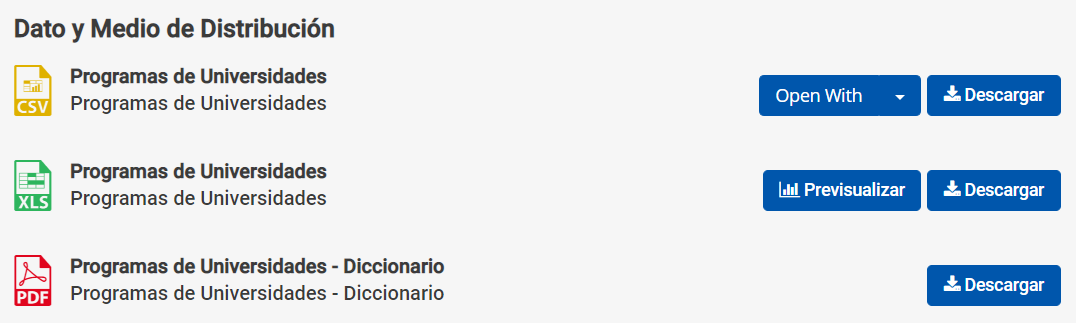

In [ ]:
#Leyendo datos de un archivo csv
from google.colab import files
cargar = files.upload()

df = pd.read_csv("/content/Programas de Universidades.csv",sep="|",encoding = "latin-1")
df.head()
#df.tail()

In [ ]:
#Leyendo datos de un archivo Excel
from google.colab import files
cargar = files.upload()

df2 = pd.read_excel("/content/Programas de Universidades.xls")
df2.head()

También existen funciones para leer otros formatos de archivo:
- read_html
- read_json
- read_sql
- read_pickle

## Consultas y funciones útiles en Dataframe

In [ ]:
#Datos del Dataframe: lista de columnas

df.columns

In [ ]:
#Datos del Dataframe: dimensiones

df.shape

In [ ]:
#Datos del Dataframe: detalles de los datos cada columna numérica

df.describe()

In [ ]:
#Datos del Dataframe: tipo de datos por columna

df.dtypes

In [ ]:
#Accediendo a los datos únicos de una columna

df["NOMBRE"].unique()

In [ ]:
#Accediendo a los datos únicos de una columna (Nivel académico)

df["NIVEL_ACADEMICO"].unique()

In [ ]:
#Accediendo a los datos únicos de una columna (Departamento)

df["DEPARTAMENTO_LOCAL"].unique()

In [ ]:
#Realizando una consulta al Dataframe: filas con Nivel Académico Doctorado

df[df["NIVEL_ACADEMICO"]=="DOCTORADO"].head()

In [ ]:
#Realizando una consulta al Dataframe: nombres de Universidades que ofrecen Doctorado

df.loc[df["NIVEL_ACADEMICO"]=="DOCTORADO","NOMBRE"]

In [ ]:
#Realizando una consulta al Dataframe: Universidades públicas que ofrecen Doctorados con AND (&)

df.loc[(df["NIVEL_ACADEMICO"]=="DOCTORADO") & (df["TIPO_GESTION"]=="PÚBLICO"),"NOMBRE"].unique()

In [ ]:
#Realizando una consulta al Dataframe: OR (|)

df.loc[(df["DEPARTAMENTO_LOCAL"]=="PIURA") | (df["DEPARTAMENTO_LOCAL"]=="TUMBES"),"NOMBRE"].unique()

## Reemplazos y modificaciones en Dataframe

In [ ]:
# Realizando cambio de nombre de columnas

df1 = df.copy()
df1 = df1.rename(columns={"NOMBRE":"NOMBRE UNIVERSIDAD","CODIGO_ENTIDAD":"CODIGO"})

df1.head()

In [ ]:
#Extrayendo solo la Universidad César Vallejo

df1 = df1[df1["NOMBRE UNIVERSIDAD"].isin(["UNIVERSIDAD CÉSAR VALLEJO S.A.C."])]
df1.head()

In [ ]:
#Extraer la lista de los programas de Doctorado del nuevo Dataframe

df1.loc[df1["NIVEL_ACADEMICO"]=="DOCTORADO","DENOMINACION_PROGRAMA"].unique()

In [ ]:
#Reemplazar el Doctorado en Psicología por Doctorado en Ciencias de la Salud Mental

df1.loc[df1["DENOMINACION_PROGRAMA"]=="DOCTORADO EN PSICOLOGÍA","DENOMINACION_PROGRAMA"] = "DOCTORADO EN CIENCIAS DE LA SALUD MENTAL"

#Validando el reemplazo
df1.loc[df1["NIVEL_ACADEMICO"]=="DOCTORADO","DENOMINACION_PROGRAMA"].unique()

In [ ]:
#Eliminando columnas

df1 = df1.drop(columns=["TIPO_AUTORIZACION_PROGRAMA","TIPO_AUTORIZACION_PROGRAMA_LOCAL"])
df1.head()

In [ ]:
#Crear una nueva columna

df1["ACTUALIZADO_POR"] = "FIORELLA HENRIQUEZ"
df1.head()

In [ ]:
#Convertir una columna float a string

print(df1["CODIGO_CLASE_PROGRAMA_N2"].dtype)

df1["CODIGO_CLASE_PROGRAMA_N2"] = df1["CODIGO_CLASE_PROGRAMA_N2"].astype(str)

print(df1["CODIGO_CLASE_PROGRAMA_N2"].dtype)

In [ ]:
#Usando la función apply y lambda

df1["PERIODO_LICENCIAMIENTO_2019"] = df1["PERIODO_LICENCIAMIENTO"].apply(lambda x: x-1)
df1.head()

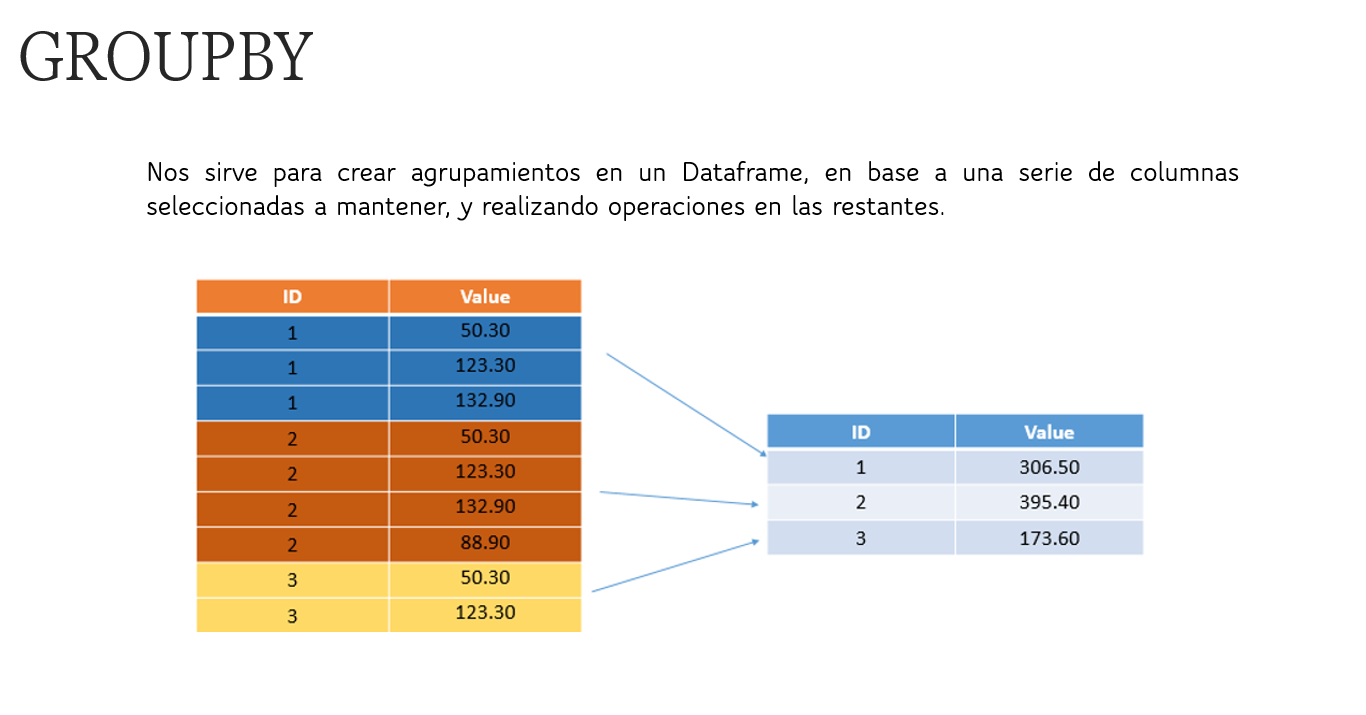




Para este ejercicio usaremos un nuevo dataset del portal Kaggle

https://www.kaggle.com/romain9292/disneyland-paris-facebook-reviews

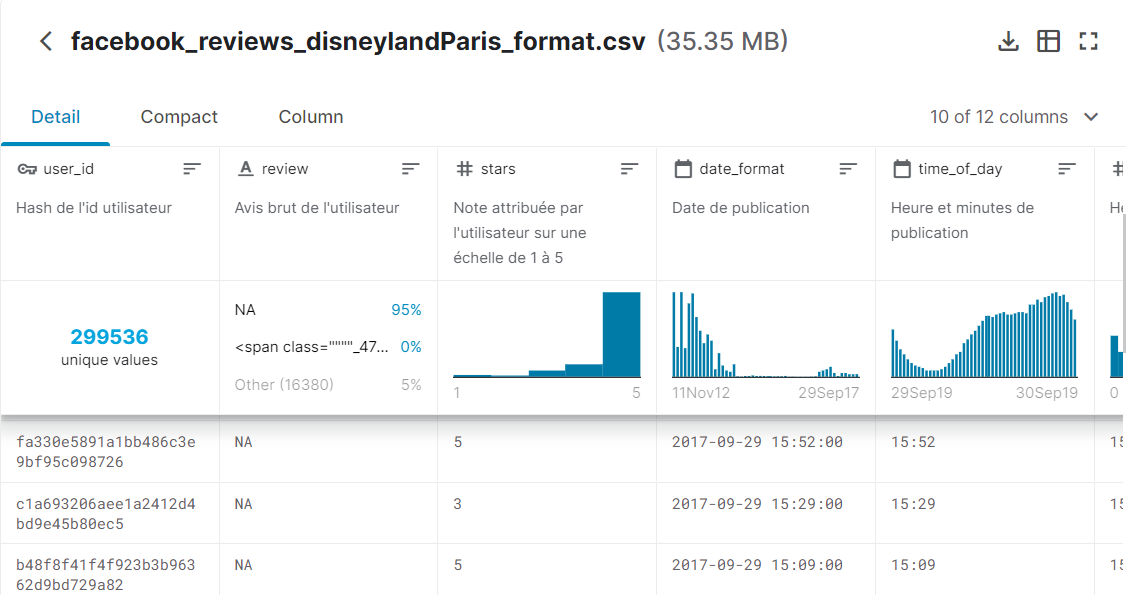

In [ ]:
#Leyendo datos de csv

#cargar = files.upload()

df3 = pd.read_csv("/content/facebook_reviews_disneylandParis_format.csv",sep=",")
df3.head()

In [ ]:
#Nombres de columnas

df3.columns

In [ ]:
#Reemplazando por nombres más amigables

df3.columns = ["ID Usuario","Review","Rating","Fecha","Hora completa","Hora","Dia Semana","Formato Review","Idioma","Mes","Tamano","Palabras"]
df3.head()

In [ ]:
#Calculando promedio de Rating por hora

df3.groupby(["Hora"])["Rating"].mean() 

In [ ]:
#Calculando # de Ratings por hora

df3.groupby(["Hora"])["Rating"].count()

In [ ]:
#Calculando # de Ratings por día de la semana

df3.groupby(["Dia Semana"])["Rating"].count()

In [ ]:
#Calculando el tamaño de reviews por día de la semana

df3.groupby(["Dia Semana"])["Tamano"].sum()

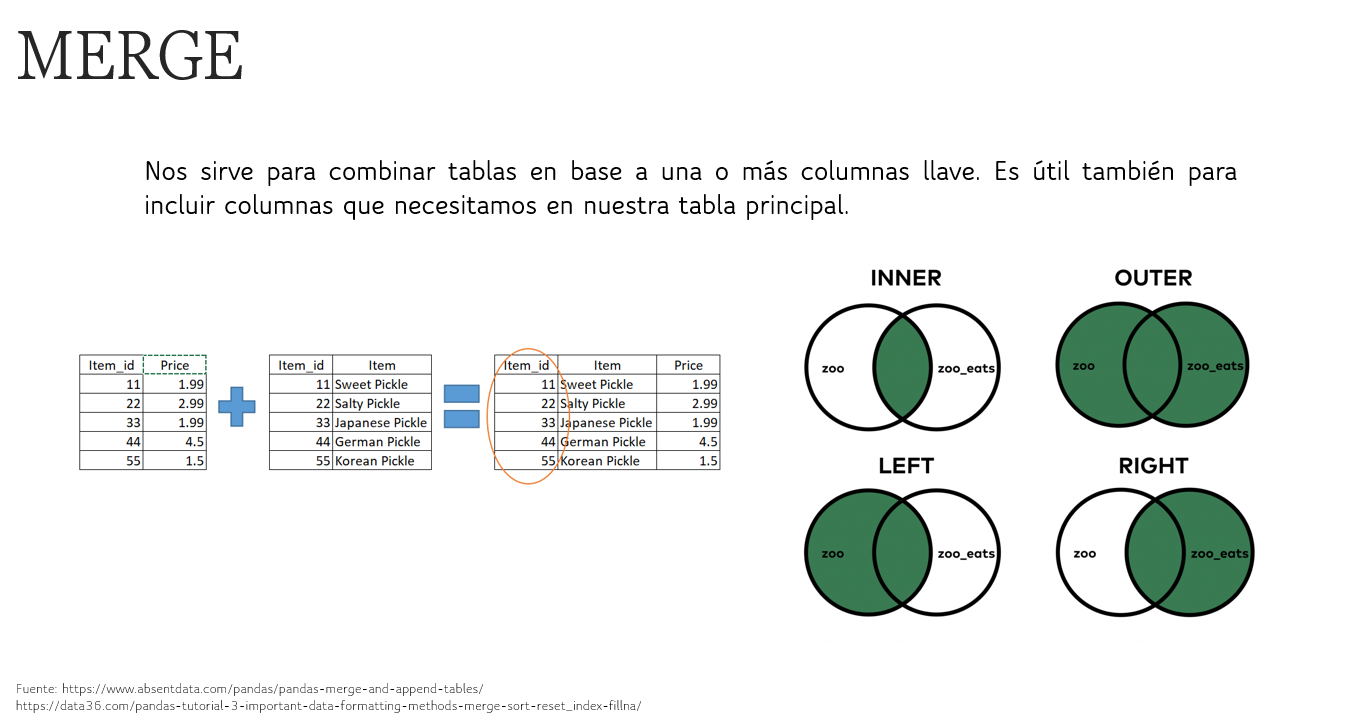

In [ ]:
#Creando tabla para transformar a español
dia_semana = {'Origen':["Lun","Mar","Mer","Jeu","Ven","Sam","Dim"], 'Dia_Semana':["Lun","Mar","Mie","Jue","Vie","Sab","Dom"]} 
dia_semana = pd.DataFrame(dia_semana)

In [ ]:
dia_semana

In [ ]:
#Realizar merge de ambas tablas

df4 = df3.merge(dia_semana, left_on="Dia Semana", right_on="Origen", how = "left")
df4.head()

In [ ]:
#Calculando el tamaño de reviews por día de la semana

df4.groupby(["Dia_Semana"])["Tamano"].sum()

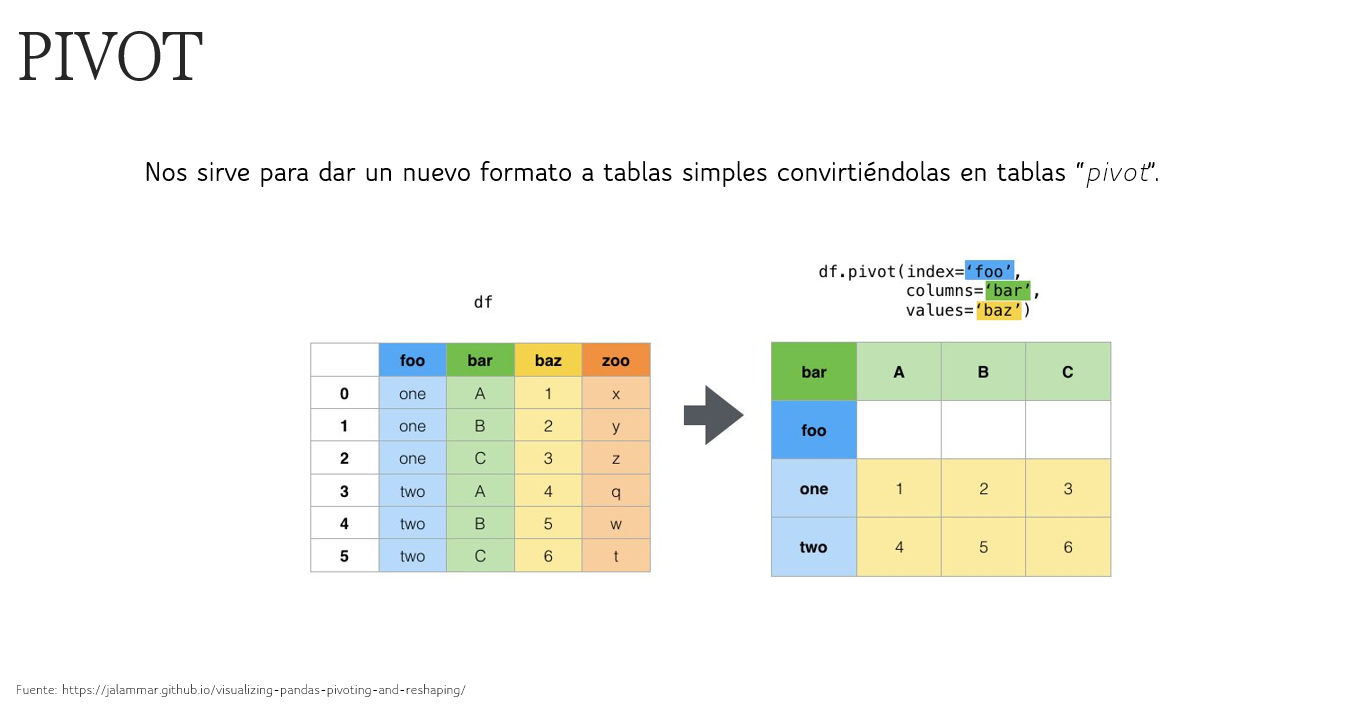

In [ ]:
#Primero preparamos la  tabla para tener las columnas necesarias agregadas

df5 = df4.groupby(["Dia_Semana","Hora"])["Rating"].mean().reset_index() 
df5

In [ ]:
#Haciendo una tabla pivot para ver resultados consolidados

df5.pivot(index="Dia_Semana",columns="Hora", values=["Rating"])

## Limpieza de Datos

Generalmente los datasets no son siempre completos ni sus datos llenados u obtenidos de forma correcta o uniforme en el tiempo.

Es por esto que un paso muy importante al preparar nuestro dataset para el análisis es evaluar si existen datos vacíos, nulos o outliers.

Una vez evaluados debemos decidir qué hacer con ellos, por ejemplo podríamos:
- Eliminar dichas observaciones
- Reemplazarlas por un valor constante
- Reemplazarlas por otros valores del dataset
- Calcular un valor aproximado con otros modelos más avanzados

In [81]:
## Evaluación de datos faltantes o vacíos mediante la función isna()

df3.isna()

,ID Usuario,Review,Rating,Fecha,Hora completa,Hora,Dia Semana,Formato Review,Idioma,Mes,Tamano,Palabras
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,True,True,False,False,False
4,False,True,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
299630,False,True,False,False,False,False,False,True,True,False,False,False
299631,False,True,False,False,False,False,False,True,True,False,False,False
299632,False,True,False,False,False,False,False,True,True,False,False,False
299633,False,True,False,False,False,False,False,True,True,False,False,False


In [82]:
#Suma del total de valores vacíos con sum de isna

df3.isna().sum()

ID Usuario             0
Review            283222
Rating                 0
Fecha                  0
Hora completa          0
Hora                   0
Dia Semana             0
Formato Review    283227
Idioma            283367
Mes                    0
Tamano                 0
Palabras               0
dtype: int64

In [83]:
#Suma del total de valores vacíos porcentualmente

df3.isna().sum() / df3.isna().count()

ID Usuario        0.000000
Review            0.945223
Rating            0.000000
Fecha             0.000000
Hora completa     0.000000
Hora              0.000000
Dia Semana        0.000000
Formato Review    0.945240
Idioma            0.945707
Mes               0.000000
Tamano            0.000000
Palabras          0.000000
dtype: float64

In [84]:
#Eliminando valores vacíos

df3a = df3.dropna(subset=["Review"], axis=0)
df3a.isna().sum()

ID Usuario          0
Review              0
Rating              0
Fecha               0
Hora completa       0
Hora                0
Dia Semana          0
Formato Review      5
Idioma            145
Mes                 0
Tamano              0
Palabras            0
dtype: int64

In [85]:
#Reemplazando valores vacíos por un valor específico

df3b = df3.copy()
df3b["Review"] = df3b["Review"].fillna("No review")
df3b.isna().sum()

ID Usuario             0
Review                 0
Rating                 0
Fecha                  0
Hora completa          0
Hora                   0
Dia Semana             0
Formato Review    283227
Idioma            283367
Mes                    0
Tamano                 0
Palabras               0
dtype: int64